In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
#3d visualization
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/results/PreprocessedResults_101participants.csv')
df

,Name,AudSD,AudSeq,AudBeat,VisSD,VisSeq,VisBeat,Musician_years of instruction ( >= 5 -> 2 ),Unnamed: 8,AudSDIntDiff (T),...,AudIrregIntDiff (T),AudIrregIntDiff (F),AudRegIntDiff (T),AudRegIntDiff (F),VisSDIntDiff (T),VisSDIntDiff (F),VisIrregIntDiff (T),VisIrregIntDiff (F),VisRegIntDiff (T),VisRegIntDiff (F)
0,10059,0.79,0.57,0.53,0.76,0.67,0.53,2,NaN,1.81,...,2.90,2.78,1.75,1.79,1.87,0.89,2.90,2.74,1.75,1.79
1,10579,0.90,0.97,1.00,0.76,0.87,0.90,1,NaN,1.73,...,2.87,2.10,1.77,0.00,1.84,0.99,2.89,2.55,1.85,1.00
2,11127,0.90,0.70,0.37,0.71,0.70,0.53,1,NaN,1.74,...,2.90,2.72,1.91,1.68,1.99,0.75,2.88,2.77,1.88,1.64
3,13536,0.79,0.57,0.50,0.57,0.60,0.23,1,NaN,1.78,...,2.82,2.88,1.67,1.87,1.85,1.36,2.92,2.73,1.86,1.74
4,14152,0.79,0.43,0.93,0.57,0.50,0.23,1,NaN,1.88,...,3.02,2.71,1.75,2.00,1.90,1.28,2.99,2.70,1.71,1.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96210,0.81,0.70,0.73,0.71,0.73,0.53,1,NaN,1.88,...,2.80,2.97,1.68,2.00,1.85,1.10,3.05,2.30,1.81,1.71
97,97732,0.71,0.53,0.87,0.50,0.50,0.30,2,NaN,1.99,...,3.08,2.59,1.77,1.75,1.70,1.58,2.99,2.70,1.78,1.76
98,98019,0.48,0.30,0.43,0.81,0.27,0.40,1,NaN,1.85,...,2.74,2.89,1.77,1.76,1.79,0.99,2.78,2.87,1.75,1.78
99,98166,0.71,0.47,0.20,0.62,0.40,0.27,1,NaN,1.88,...,2.96,2.75,1.67,1.79,1.95,1.13,2.98,2.76,1.88,1.73


In [12]:
# df.describe()

In [6]:
# to check if we have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Name                                         101 non-null    int64  
 1   AudSD                                        101 non-null    float64
 2   AudSeq                                       101 non-null    float64
 3   AudBeat                                      101 non-null    float64
 4   VisSD                                        101 non-null    float64
 5   VisSeq                                       101 non-null    float64
 6   VisBeat                                      101 non-null    float64
 7   Musician_years of instruction ( >= 5 -> 2 )  101 non-null    int64  
 8   Unnamed: 8                                   0 non-null      float64
 9   AudSDIntDiff (T)                             101 non-null    float64
 10  Au

In [7]:
df.columns

Index(['Name', 'AudSD', 'AudSeq', 'AudBeat', 'VisSD', 'VisSeq', 'VisBeat',
       'Musician_years of instruction ( >= 5 -> 2 )', 'Unnamed: 8',
       'AudSDIntDiff (T)', 'AudSDIntDiff (F)', 'AudIrregIntDiff (T)',
       'AudIrregIntDiff (F)', 'AudRegIntDiff (T)', 'AudRegIntDiff (F)',
       'VisSDIntDiff (T)', 'VisSDIntDiff (F)', 'VisIrregIntDiff (T)',
       'VisIrregIntDiff (F)', 'VisRegIntDiff (T)', 'VisRegIntDiff (F)'],
      dtype='object')

In [8]:
df=df[['AudSD', 'AudSeq', 'AudBeat', 'VisSD', 'VisSeq', 'VisBeat']]
df

,AudSD,AudSeq,AudBeat,VisSD,VisSeq,VisBeat
0,0.79,0.57,0.53,0.76,0.67,0.53
1,0.90,0.97,1.00,0.76,0.87,0.90
2,0.90,0.70,0.37,0.71,0.70,0.53
3,0.79,0.57,0.50,0.57,0.60,0.23
4,0.79,0.43,0.93,0.57,0.50,0.23
...,...,...,...,...,...,...
96,0.81,0.70,0.73,0.71,0.73,0.53
97,0.71,0.53,0.87,0.50,0.50,0.30
98,0.48,0.30,0.43,0.81,0.27,0.40
99,0.71,0.47,0.20,0.62,0.40,0.27


In [9]:
plt.style.use('fivethirtyeight')

In [10]:
df_a=df.iloc[:,[0,1,2]]
df_a

,AudSD,AudSeq,AudBeat
0,0.79,0.57,0.53
1,0.90,0.97,1.00
2,0.90,0.70,0.37
3,0.79,0.57,0.50
4,0.79,0.43,0.93
...,...,...,...
96,0.81,0.70,0.73
97,0.71,0.53,0.87
98,0.48,0.30,0.43
99,0.71,0.47,0.20


In [11]:
df_a.columns=['single interval','non-beat sequence','beat sequence']
df_a

,single interval,non-beat sequence,beat sequence
0,0.79,0.57,0.53
1,0.90,0.97,1.00
2,0.90,0.70,0.37
3,0.79,0.57,0.50
4,0.79,0.43,0.93
...,...,...,...
96,0.81,0.70,0.73
97,0.71,0.53,0.87
98,0.48,0.30,0.43
99,0.71,0.47,0.20


In [12]:
df_v = df.iloc[:,[3,4,5]]
df_v.columns = ['single interval','non-beat sequence','beat sequence']

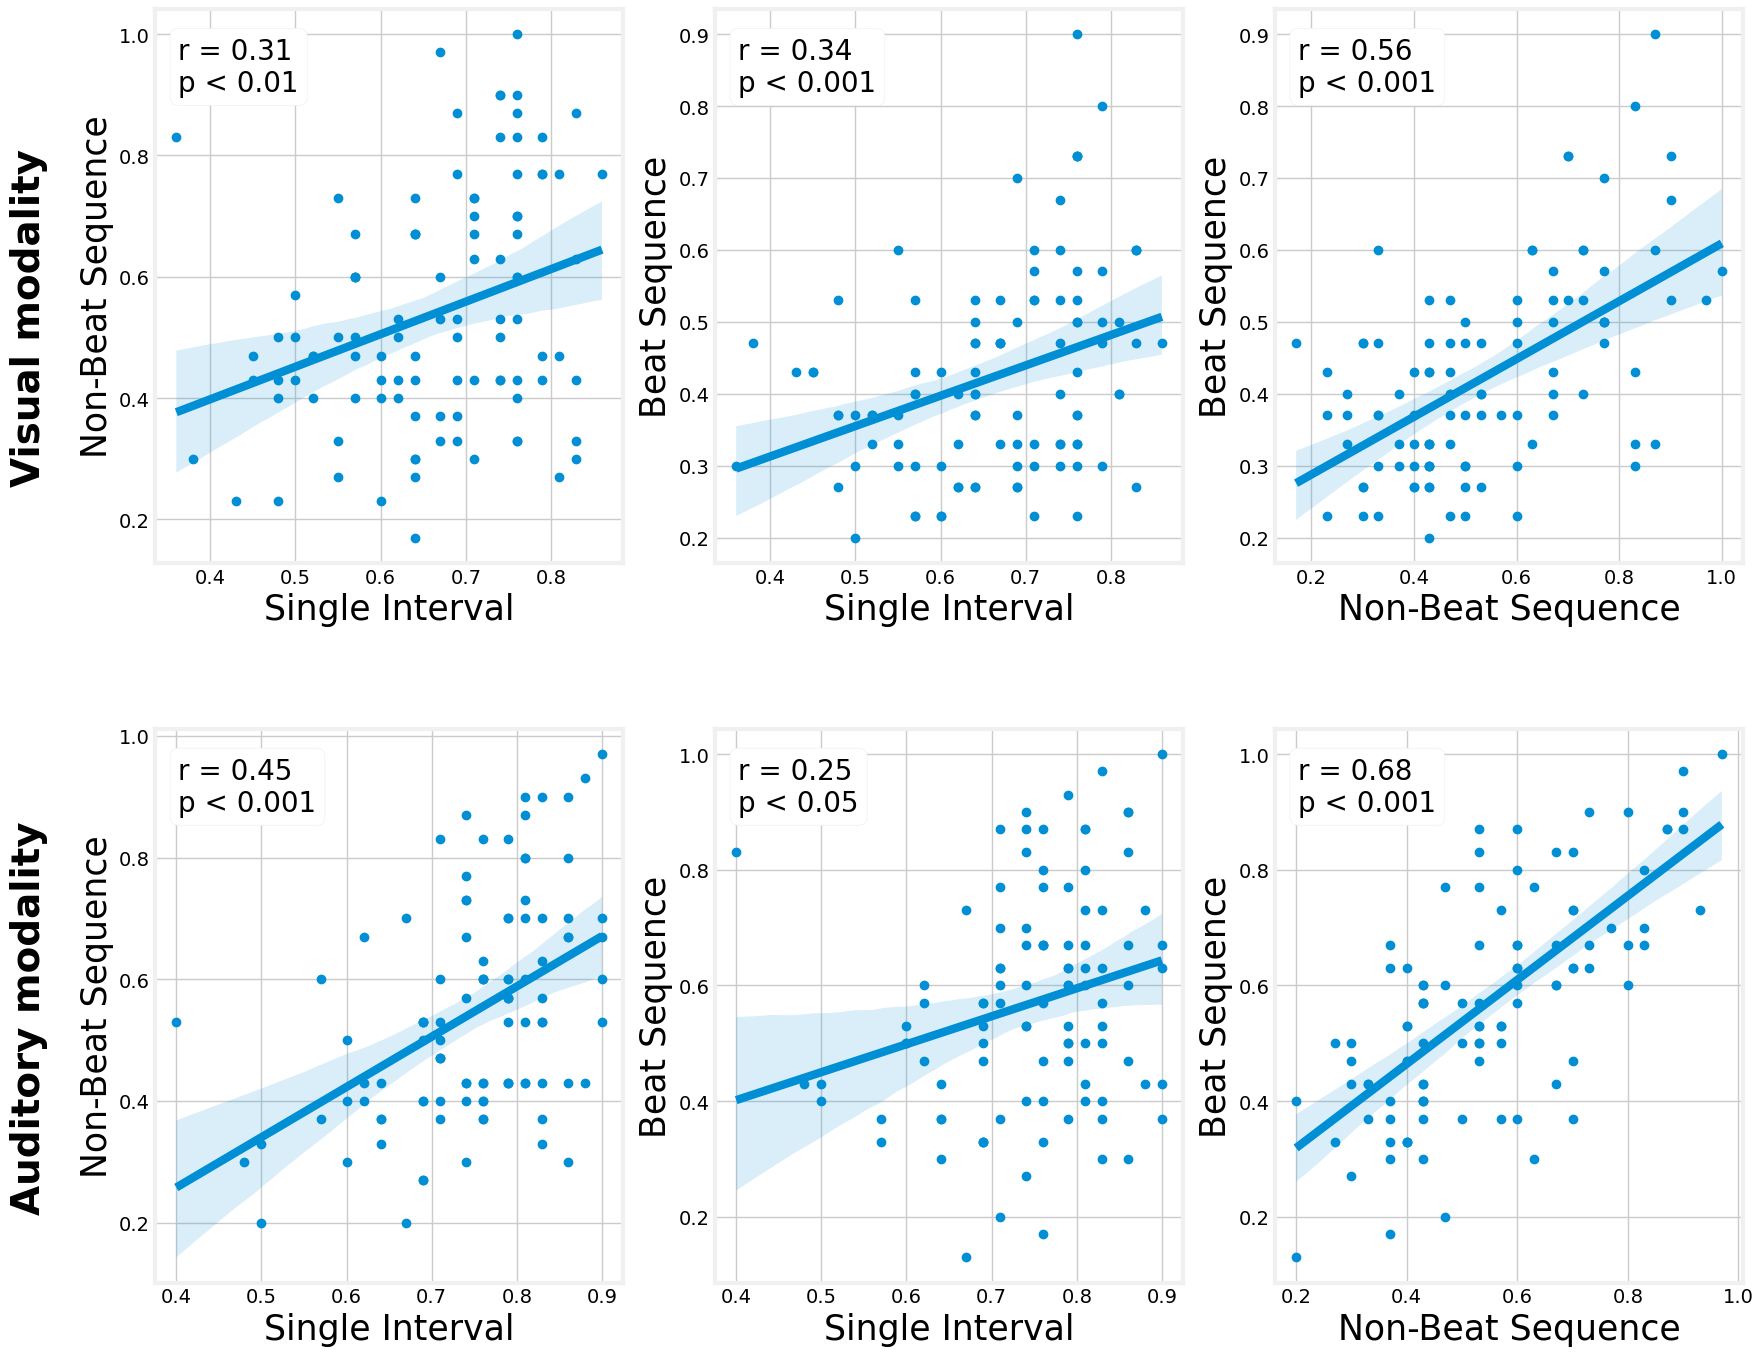

In [13]:


# Assume df_v and df_a are your DataFrames
col1_v, col2_v, col3_v = df_v.columns[:3]  # Extract column names for df_v
col1_a, col2_a, col3_a = df_a.columns[:3]  # Extract column names for df_a

# Set up the figure for a 2x3 grid of plots
fig, axes = plt.subplots(2, 3, figsize=(18, 14), facecolor='white')

# Define pairs to plot for df_v
pairs_v = [(col1_v, col2_v), (col1_v, col3_v), (col2_v, col3_v)]
for i, (x_col, y_col) in enumerate(pairs_v):
    ax = axes[0, i]  # Top row
    sns.regplot(data=df_v, x=x_col, y=y_col, ax=ax, scatter_kws={'alpha': 1})
    corr, p_value = pearsonr(df_v[x_col], df_v[y_col])
    p_str = 'p < 0.001' if p_value < 0.001 else ('p < 0.01' if p_value < 0.01 else (f'p = {p_value:.3g}' if p_value >= 0.05 else 'p < 0.05'))
    
    ax.annotate(f'r = {corr:.2f}\n{p_str}', xy=(0.05, 0.95), xycoords='axes fraction',
                ha='left', va='top', fontsize=20, bbox=dict(boxstyle="round,pad=0.3", alpha=1, facecolor='white'))
    
    ax.set_xlabel(x_col.replace('_', ' ').title(), fontsize=25)
    ax.set_ylabel(y_col.replace('_', ' ').title(), fontsize=25)
    ax.set_facecolor('white')

# Define pairs to plot for df_a
pairs_a = [(col1_a, col2_a), (col1_a, col3_a), (col2_a, col3_a)]
for i, (x_col, y_col) in enumerate(pairs_a):
    ax = axes[1, i]  # Bottom row
    sns.regplot(data=df_a, x=x_col, y=y_col, ax=ax, scatter_kws={'alpha': 1})
    corr, p_value = pearsonr(df_a[x_col], df_a[y_col])
    p_str = 'p < 0.001' if p_value < 0.001 else ('p < 0.01' if p_value < 0.01 else (f'p = {p_value:.3g}' if p_value >= 0.05 else 'p < 0.05'))
    
    ax.annotate(f'r = {corr:.2f}\n{p_str}', xy=(0.05, 0.95), xycoords='axes fraction',
                ha='left', va='top', fontsize=20, bbox=dict(boxstyle="round,pad=0.3", alpha=1, facecolor='white'))
    
    ax.set_xlabel(x_col.replace('_', ' ').title(), fontsize=25)
    ax.set_ylabel(y_col.replace('_', ' ').title(), fontsize=25)
    ax.set_facecolor('white')

# Add DataFrame labels on the left side of each row
fig.text(0.03, 0.75, 'Visual modality', fontsize=28, fontweight='bold', ha='center', va='center', rotation='vertical')
fig.text(0.03, 0.25, 'Auditory modality', fontsize=28, fontweight='bold', ha='center', va='center', rotation='vertical')

# Set the main title and adjust layout
fig.suptitle('', fontsize=24, y=1.02)
plt.tight_layout()
plt.subplots_adjust(left=0.1, hspace=0.3)  # Adjust space between rows and add left margin for labels


### tif format
# tif_path = r'E:\My own PhD papers\First project\paper figures\correlations.tif'
# plt.savefig(tif_path, bbox_inches='tight', dpi=600)  # Use 600 DPI for line drawings

### png format
plt.savefig('C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/plots/correlations.png', bbox_inches='tight',dpi=400)

plt.show()
